Linear Regression R²: 0.896, RMSE: 0.267
Random Forest R²: 0.824, RMSE: 0.347
Decision Tree R²: 0.860, RMSE: 0.309


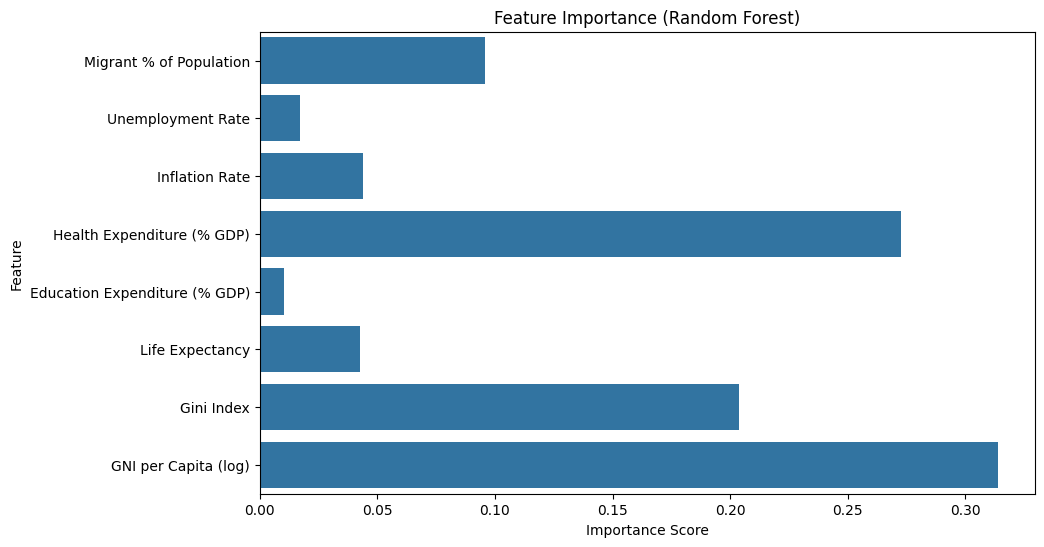

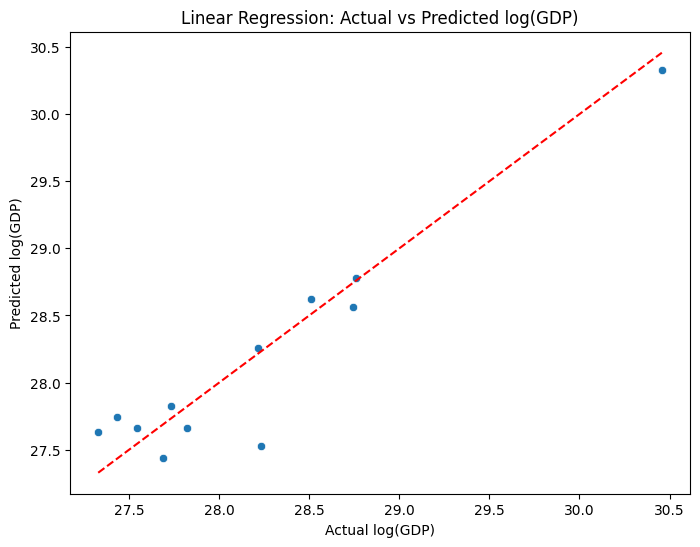

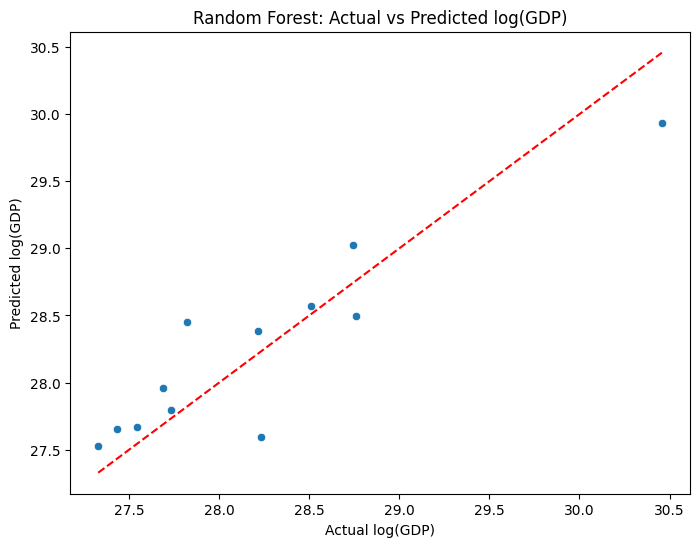

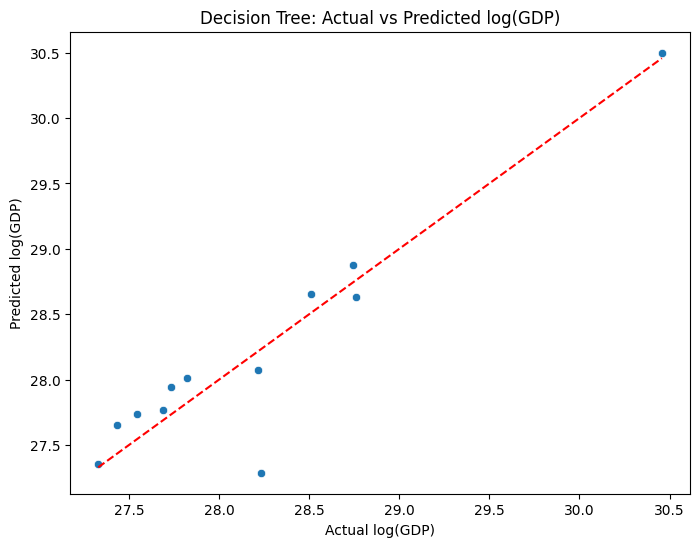

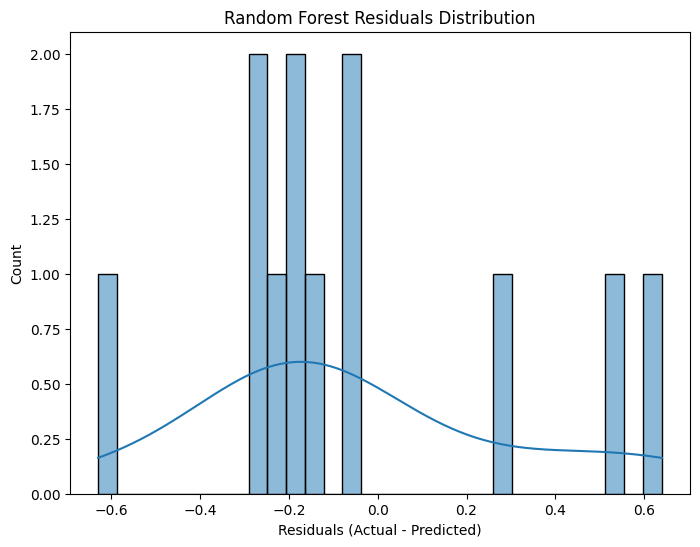

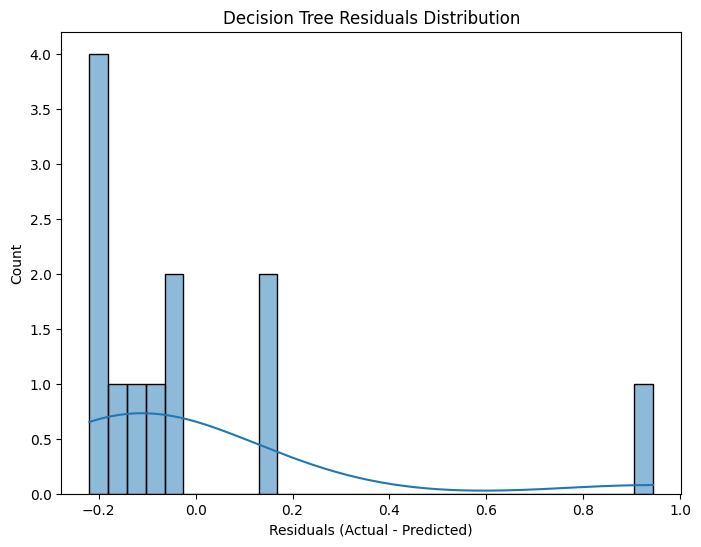

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("data/master_dataset_1980_2024.csv")

# Features and target
features = [
    "Migrant % of Population",
    "GNI per Capita",
    "Unemployment Rate",
    "Inflation Rate",
    "Health Expenditure (% GDP)",
    "Education Expenditure (% GDP)",
    "Life Expectancy",
    "Gini Index"
]
target = "GDP"

# Clean and transform
df_clean = df[features + [target]].dropna()
df_clean["log_GDP"] = np.log(df_clean["GDP"])
df_clean["log_GNI_per_Capita"] = np.log(df_clean["GNI per Capita"])

# Prepare X and y
X = df_clean.drop(columns=["GDP", "log_GDP", "GNI per Capita"])
X = X.rename(columns={"log_GNI_per_Capita": "GNI per Capita (log)"})
y = df_clean["log_GDP"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression R²: {r2_lr:.3f}, RMSE: {rmse_lr:.3f}")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest R²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree R²: {r2_dt:.3f}, RMSE: {rmse_dt:.3f}")

# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Actual vs Predicted plots
for model_name, y_pred in zip(["Linear Regression", "Random Forest", "Decision Tree"], [y_pred_lr, y_pred_rf, y_pred_dt]):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual log(GDP)")
    plt.ylabel("Predicted log(GDP)")
    plt.title(f"{model_name}: Actual vs Predicted log(GDP)")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

# Residual plots
residuals_rf = y_test - y_pred_rf
residuals_dt = y_test - y_pred_dt

plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title("Random Forest Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals_dt, bins=30, kde=True)
plt.title("Decision Tree Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()
